In [1]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt
import networkx as nx
from itertools import chain
import numpy as np

In [2]:
df = pd.read_excel('solar_pv_raw.xlsx')

In [11]:
df[df['First Claim'].str.contains('mounting')].describe()

,Application Year,Publication Year,Count of Simple Family Members,Simple Family Cited by Count,Count of INPADOC Family Members,\tINPADOC Family Cited by Count,Count of Other References,Count of Cited by Patents,Count of Cites Patents,Count of Cited by Patents Within 3 years,Count of Cited by Patents Within 5 years,Count of Extended Family Members,Extented Family Cited by Count
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000
mean,1999.217391,2002.169082,6.154589,83.188406,7.917874,96.521739,3.560386,45.589372,32.763285,7.053140,11.314010,9.47343,98.637681
std,12.568495,13.324385,5.630643,99.971492,8.387926,111.780030,8.808920,61.244619,42.836413,13.135296,21.419367,12.23468,112.420281
min,1971.000000,1973.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
25%,1990.000000,1991.000000,2.000000,19.000000,2.000000,21.000000,0.000000,4.000000,7.000000,0.000000,1.000000,3.00000,23.000000
50%,2003.000000,2008.000000,4.000000,47.000000,6.000000,51.000000,0.000000,21.000000,13.000000,3.000000,5.000000,6.00000,53.000000
75%,2010.000000,2014.000000,9.000000,105.000000,11.000000,130.500000,2.000000,62.500000,36.500000,8.000000,11.000000,12.00000,135.000000
max,2014.000000,2018.000000,26.000000,507.000000,66.000000,507.000000,83.000000,320.000000,228.000000,96.000000,144.000000,122.00000,507.000000


In [12]:
df['Count of Cites Patents'].sum()

179523

In [13]:
#df.apply(lambda x: x.str.strip(),axis = 1) #적용안됨

In [14]:
#df['Cites Patents'].str.strip()#적용안됨

df1은 인도메인 등록번호들

In [15]:
df1 = df[['Publication Number']]
len_d = len(df1) # 데이터프레임 행의 길이
indomain = ['1']*len_d
df1['indomain'] = indomain
df1 = df1.rename(columns={'Publication Number':'Cites Patents'})
df1

<ipython-input-15-edfc3a0d7e7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['indomain'] = indomain


,Cites Patents,indomain
0,US3679949,1
1,US3658596,1
2,US4024397,1
3,US3780424,1
4,US3690953,1
...,...,...
8081,US8981388,1
8082,US8846431,1
8083,US9029188,1
8084,US9024179,1


def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))
lens = df['Cites Patents'].str.split('|').map(len)

res = pd.DataFrame({'Publication Number': np.repeat(df['Publication Number'],lens),
                    'Cites Patents' : chainer(df['Cites Patents'])
                   })
res

스플릿 한다음 원하는 데이터를 해당 길이만큼 복사해서 넣을때

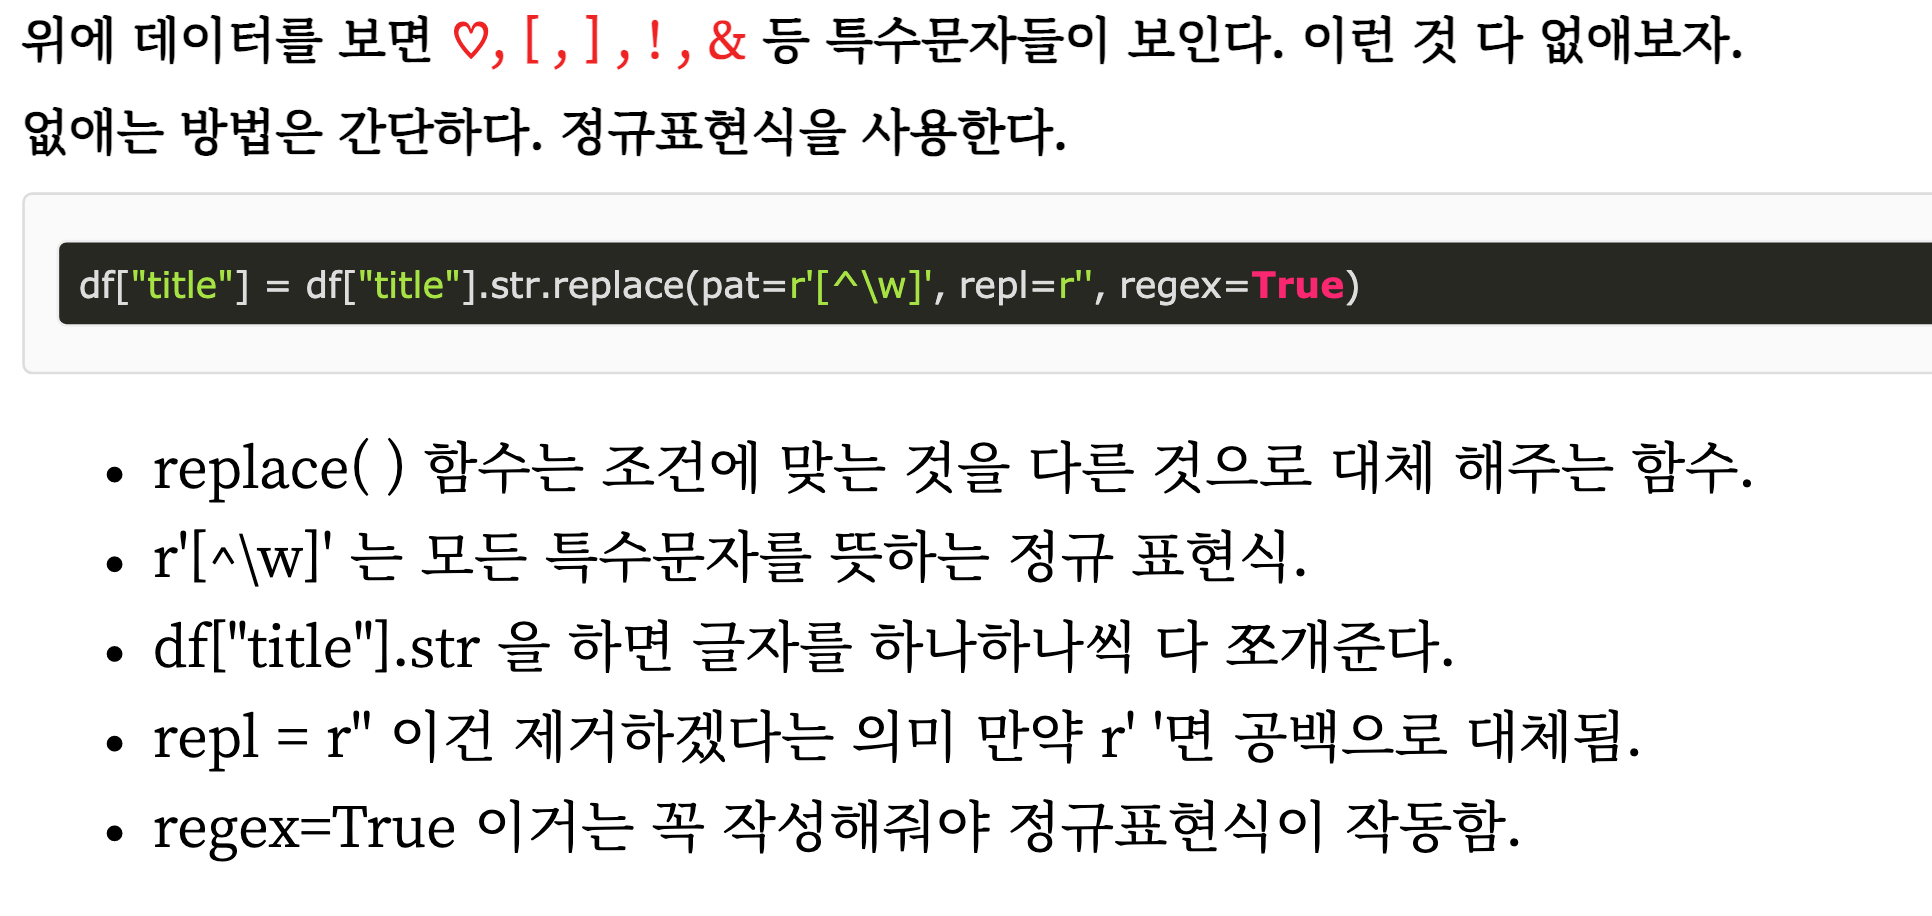

In [16]:
#import re
#df['Cites Patents'] = re.split('|','',df['Cites Patents'])
#df[['Cites Patents']]

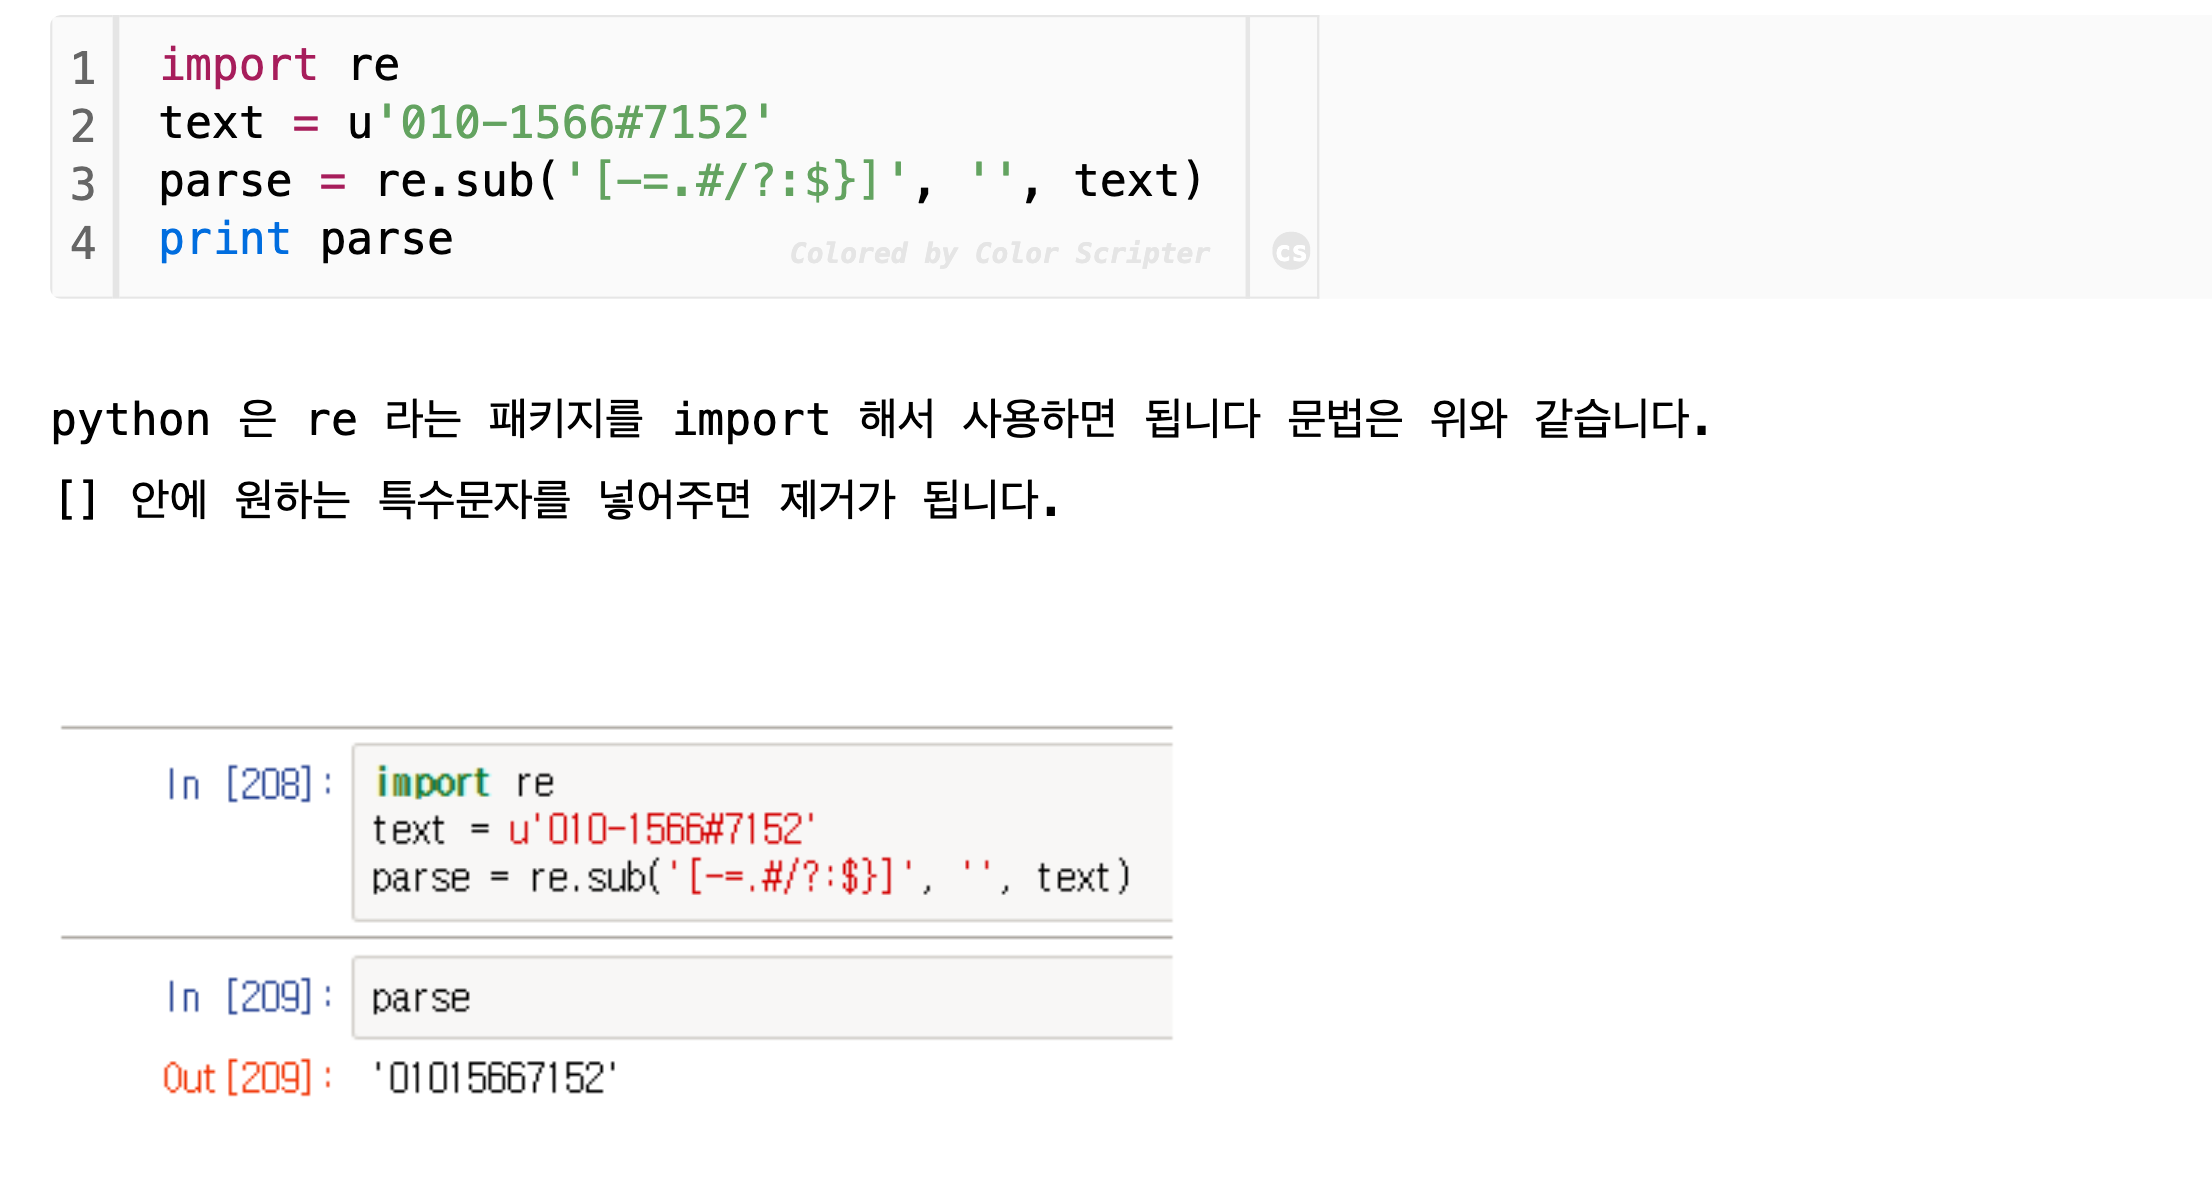

In [17]:
def chainer(s):
    return list(chain.from_iterable(s.str.split(' | ')))
lens = df['Cites Patents'].str.split(' | ').map(len) #앞으로 공백 있는애, 뒤로 공백있는애 다 있음 

res = pd.DataFrame({'Publication Number': np.repeat(df['Publication Number'],lens),
                    'Application Year':np.repeat(df['Application Year'],lens),
                    'Cites Patents' : chainer(df['Cites Patents'])
                   })
res.head()

,Publication Number,Application Year,Cites Patents
0,US3679949,1970,US3104188
0,US3679949,1970,|
0,US3679949,1970,US3443170
0,US3679949,1970,|
0,US3679949,1970,US3267317


In [18]:
#res['Cites Patents'].str.contains('')

In [19]:
res = res[res['Cites Patents'] != '|']

In [20]:
res

,Publication Number,Application Year,Cites Patents
0,US3679949,1970,US3104188
0,US3679949,1970,US3443170
0,US3679949,1970,US3267317
0,US3679949,1970,US3560812
0,US3679949,1970,US3053926
...,...,...,...
8085,US9035015,2015,US20080087324A1
8085,US9035015,2015,US7605225
8085,US9035015,2015,US20070131270A1
8085,US9035015,2015,US20070154704A1


# 선택하여 열 이름 변경하기
df.rename(columns={'Before':'After'})

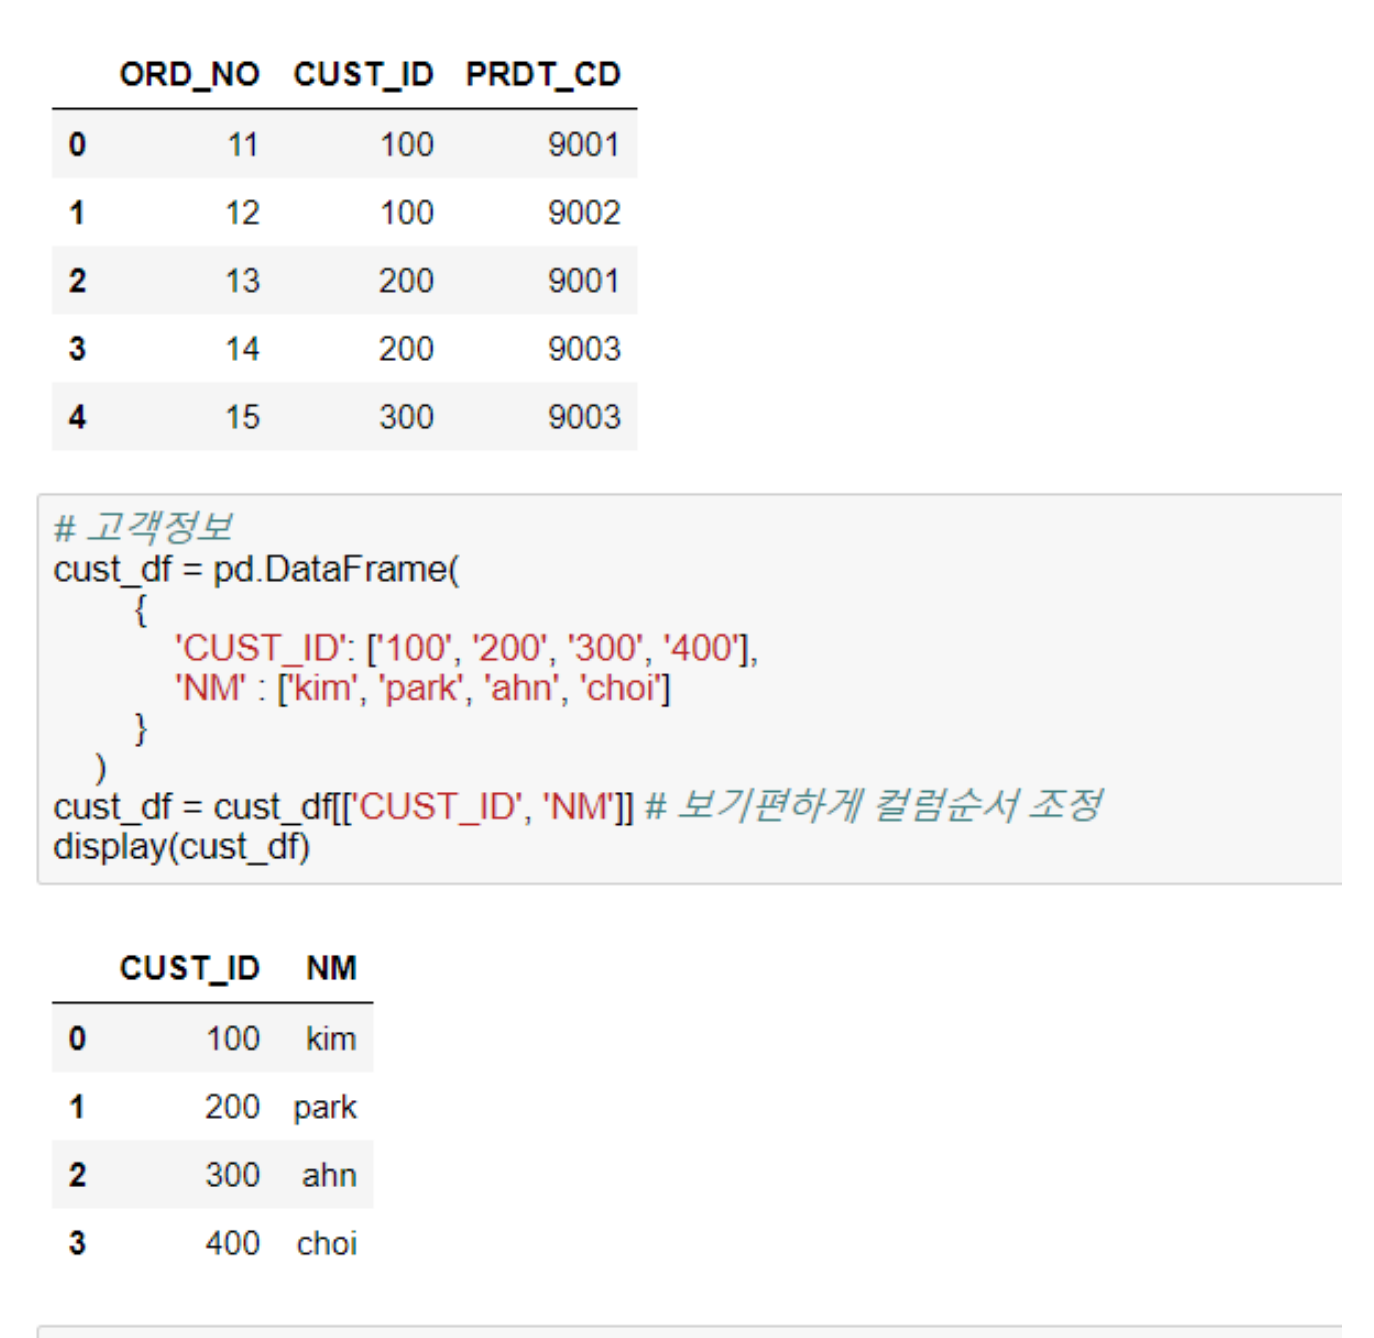

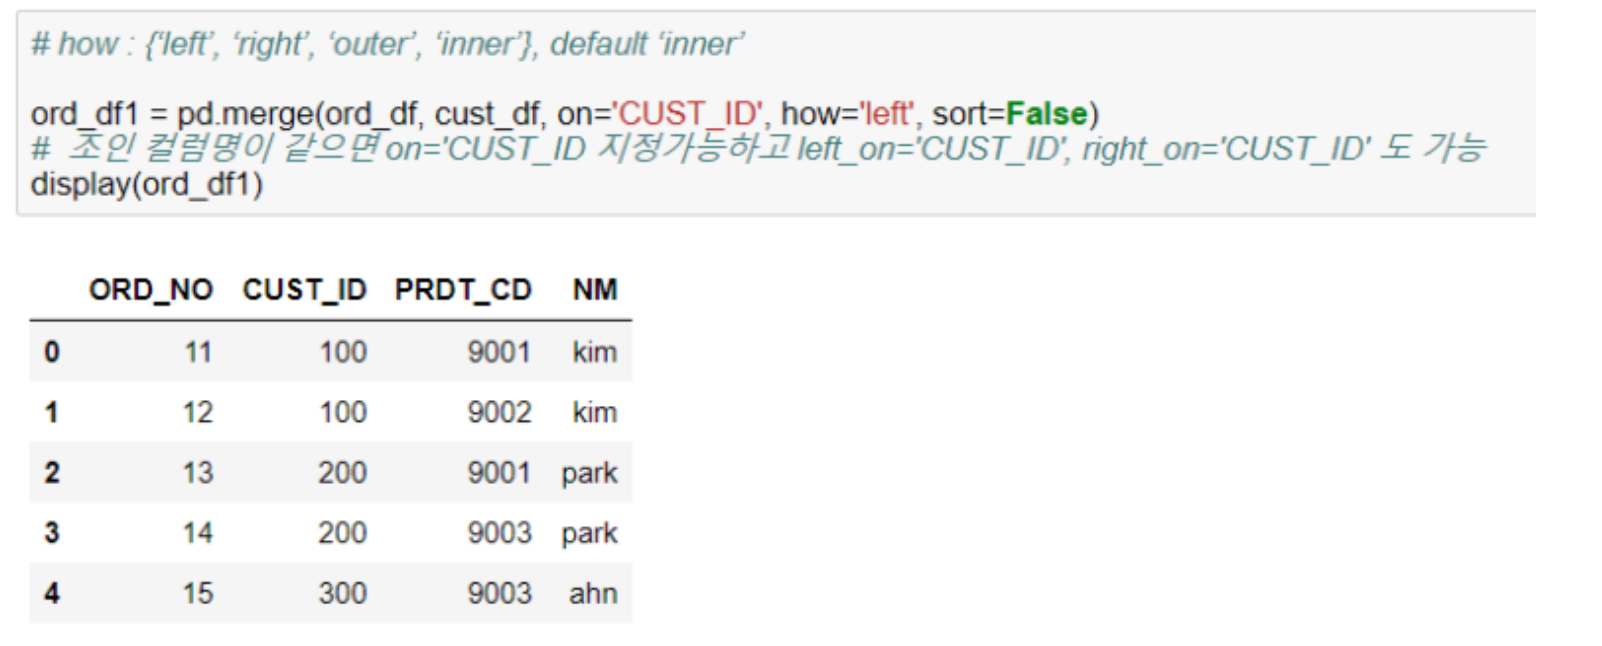

생각보다 인도메인이 많지 않다

In [21]:
merge = pd.merge(res,df1,on='Cites Patents',how='left',sort=False)
indomain_patents = merge[merge['indomain']=='1']
indomain_patents

,Publication Number,Application Year,Cites Patents,indomain
117,US3735943,1971,US3620846,1
123,US3735942,1971,US3620846,1
148,US3948468,1971,US3620846,1
274,US3760257,1972,US3615853,1
320,US3969746,1973,US3772770,1
...,...,...,...,...
179551,US8846431,2014,US6180869,1
179552,US8846431,2014,US4330680,1
179554,US8846431,2014,US4153476,1
179562,US9029188,2014,US8110431,1


## merge.to_excel('merge.xlsx') 

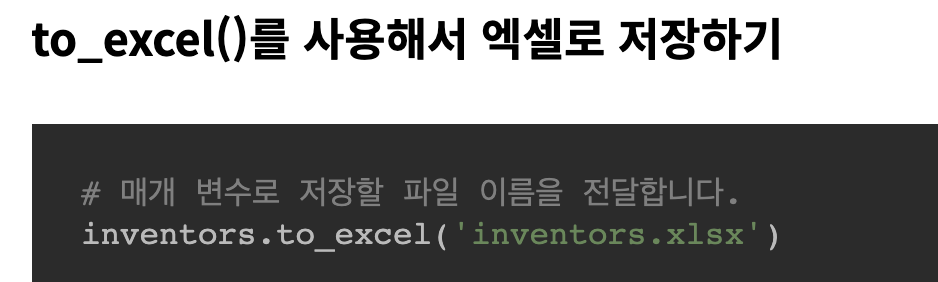

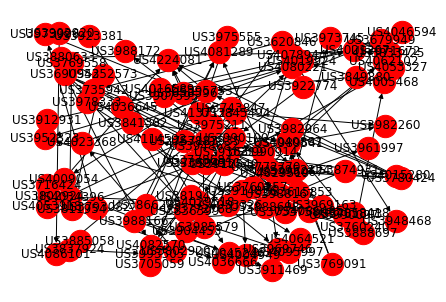

In [267]:
g = nx.from_pandas_edgelist(indomain_patents.head(100),'Cites Patents','Publication Number',create_using=nx.DiGraph())
nx.draw_random(g, with_labels=True, node_color = 'red', node_size=500)

In [268]:
node_dict={
    "degree":dict(g.degree()), 
    "degree_centrality":nx.degree_centrality(g),
    "closeness_centrality":nx.closeness_centrality(g), 
    "betweenness_centrality":nx.betweenness_centrality(g), 
    "pagerank":nx.pagerank(g) 
}
pd.DataFrame(node_dict).head()

,degree,degree_centrality,closeness_centrality,betweenness_centrality,pagerank
US3620846,3,0.027778,0.000000,0.0,0.006306
US3735943,1,0.009259,0.009259,0.0,0.008093
US3735942,1,0.009259,0.009259,0.0,0.008093
US3948468,1,0.009259,0.009259,0.0,0.008093
US3615853,2,0.018519,0.000000,0.0,0.006306
